<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
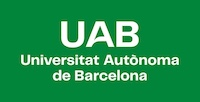
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Adquisició de dades en Python

## Instruccions d'ús

A continuació es presentaran explicacions i exemples d'adquisició de
dades en Python. Recordeu que podeu anar executant els exemples per
obtenir-ne els resultats.

## Introducció

Els processos d'adquisició de dades són molt diversos. En aquesta
unitat, veurem exemples d'adquisició de dades d'internet amb tres
mètodes diferents:

-   descàrrega directa
-   petició a APIs de tercers
-   *web crawling*

Pel que respecta a la interacció amb APIs de tercers, repassarem dues
alternatives, la construcció manual de les peticions HTTP i l'ús de
llibreries Python.

En relació amb el _web crawling_, veurem com utilitzar la llibreria
[Scrapy](https://scrapy.org/) per construir un petit _web
crawler_ que capturi dades del nostre interès.

## Primers passos

En aquesta unitat treballarem diverses vegades amb dades en format
JSON (recordeu que ja hem introduït el format JSON a la xwiki).

La llibreria json de Python ens ofereix algunes funcions molt útils per
a treballar en aquest format. Per exemple, podem obtenir la
representació JSON d'objectes Python o crear objectes Python a partir de
la seva representació en JSON.

In [1]:
# Construïm un diccionari d'exemple i mostrem el tipus de dades i el contingut de la variable.
diccionario_ejemplo = {"nombre": "Yann", "apellidos": {"apellido1": "LeCun", "apellido2": "-"}, "edad": 56}
print(type(diccionario_ejemplo))
print(diccionario_ejemplo)

# Construïm una llista d'exemple i mostrem el tipus de dades i el contingut de la variable.
lista_ejemplo = [1, 2, 3]
print(type(lista_ejemplo))
print(lista_ejemplo)

<class 'dict'>
{'nombre': 'Yann', 'apellidos': {'apellido1': 'LeCun', 'apellido2': '-'}, 'edad': 56}
<class 'list'>
[1, 2, 3]


In [2]:
# Importem la llibreria json.
import json

# Mostrem la representació JSON del diccionari.
json_dict = json.dumps(diccionario_ejemplo)
print(type(json_dict))
print(json_dict)

# Mostrem la representació JSON de la llista.
json_list = json.dumps(lista_ejemplo)
print(type(json_list))
print(json_list)

<class 'str'>
{"nombre": "Yann", "apellidos": {"apellido1": "LeCun", "apellido2": "-"}, "edad": 56}
<class 'str'>
[1, 2, 3]


Fixeu-vos que, en ambdós casos, obtenim una cadena de caràcters que ens
representa, en format JSON, els objectes Python. Aquest procés es coneix
com a **serialitzar** l'objecte.

També podem fer el procés invers (conegut com a **desserialitzar**), creant
objectes Python (per exemple, llistes o diccionaris) a partir de cadenes
de text en format JSON.

In [3]:
# Desserialitzem la cadena 'json_dict'.
diccionario_ejemplo2 = json.loads(json_dict)
print(type(diccionario_ejemplo2))
print(diccionario_ejemplo2)

# Desserialitzem la cadena 'json_list'.
lista_ejemplo2 = json.loads(json_list)
print(type(lista_ejemplo2))
print(lista_ejemplo2)

<class 'dict'>
{'nombre': 'Yann', 'apellidos': {'apellido1': 'LeCun', 'apellido2': '-'}, 'edad': 56}
<class 'list'>
[1, 2, 3]


Per millorar la llegibilitat de les dades que obtindrem de les APIs,
definirem una funció que mostrarà cadenes JSON per pantalla formatades
per millorar-ne la lectura. La funció acceptarà tant cadenes de
caràcters amb contingut JSON com objectes Python, i mostrarà el
contingut per pantalla.

A més, la funció rebrà un paràmetre opcional que ens permetrà indicar el
nombre màxim de línies que cal mostrar. Així, podrem fer servir la funció per
a visualitzar les primeres línies d'un JSON llarg, sense haver de
mostrar el JSON complet per pantalla.

In [4]:
# Defineix la funció 'json_print', que té un paràmetre obligatori 'json_data' i un paràmetre opcional 'limit'
# i no torna cap valor.
# La funció mostra per pantalla el contingut de la variable 'json_data' en format JSON, limitant el nombre 
# de línies per mostrar si s'inclou el paràmetre 'limit'.
def json_print (json_data, limit = None):
    if isinstance(json_data, (str)):
        json_data = json.loads(json_data)
    nice = json.dumps(json_data, sort_keys=True, indent=3, separators=(',', ': '))
    print("\n".join(nice.split("\n")[0:limit]))
    if limit is not None:
        print("[...]")

Vegem un exemple del resultat d'utilitzar la funció que acabem de
definir.

In [5]:
# Mostra el valor de la variable 'json_exemple' amb la funció 'print'.
json_exemple = '{"nombre": "Yann", "apellidos": {"apellido1": "LeCun", "apellido2": "-"}, "edad": 56}'
print(json_exemple)

{"nombre": "Yann", "apellidos": {"apellido1": "LeCun", "apellido2": "-"}, "edad": 56}


In [6]:
# Mostra el valor de la variable 'json_exemple' amb la funció 'json_print' que acabem de definir.
json_print(json_exemple)

{
   "apellidos": {
      "apellido1": "LeCun",
      "apellido2": "-"
   },
   "edad": 56,
   "nombre": "Yann"
}


In [7]:
# Mostrem únicament les tres primeres línies.
json_print(json_exemple, 3)

{
   "apellidos": {
      "apellido1": "LeCun",
[...]


## Descàrrega directa de dades

La descàrrega directa del conjunt de dades és potser el mètode més
senzill d'adquisició de dades i consisteix a descarregar un fitxer amb
les dades d'interès ja recopilades per algun altre analista. De fet, a
la unitat anterior ja hem fet servir aquest mètode per adquirir el
fitxer amb les dades sobre els personatges de còmic de Marvel. Un cop
descarregat el fitxer, el procediment per carregar-lo en Python dependrà
del format concret (ja hem vist un exemple de càrrega de dades des d'un
fitxer .csv).

Alguns dels llocs web on podeu trobar conjunts de dades a analitzar són:
- [Open Data gencat](http://dadesobertes.gencat.cat/en/), el portal de
dades obertes de la Generalitat.
- [datos.gov.es](http://datos.gob.es/es/catalogo), el catàleg de conjunts
de dades del Govern d'Espanya. 
- [European Data
Sources](https://data.europa.eu/), el portal de dades obertes de la Unió
Europea. 
- [Mark Newman network
datasets](http://www-personal.umich.edu/~mejn/netdata/), conjunts de
dades en forma de xarxa recopilats per Mark Newman. 
- [Stanford Large
Network Dataset Collection](http://snap.stanford.edu/data/), un altre
recopilatori de conjunts de dades en forma de xarxa, en aquest cas creat
per Jure Leskovec. 
- [SecRepo.com](http://www.secrepo.com/), dades
relacionades amb la seguretat. 
- [AWS Public
Datasets](https://aws.amazon.com/public-datasets/), conjunts de dades
recopilades i hostatjades per Amazon. 
- [UC Irvine Machine Learning
Repository](http://archive.ics.uci.edu/ml/), dades recopilades per un
grup de recerca de la Universitat de Califòrnia, Irvine. 
- El
[repositori de Five Thirty Eight](https://github.com/fivethirtyeight),
que recull dades utilitzades a articles de la publicació i que ja hem
vist a la unitat anterior.

Ús d'API de tercers
--------------------

### Accés a API manualment

Podem utilitzar la llibreria de Python
[Requests](http://docs.python-requests.org/) per a realitzar
peticions als webs API de manera manual. Per fer-ho, haurem d'accedir
a la documentació de l'API amb la qual vulguem actuar, construir
manualment les peticions per obtenir la informació desitjada i processar
també manualment la resposta rebuda.

Vegem un exemple de petició HTTP a una API pública. El lloc
http://postcodes.io/ ofereix una API de geolocalització sobre codis
postals al Regne Unit. Llegint la documentació, podem veure que té un
mètode GET amb la URL
http://api.postcodes.io/postcodes/:código-postal,
que ens retorna informació del codi postal especificat.

In [8]:
# Importem la llibreria.
import requests

# Fem una petició get a l'API, preguntant sobre el codi postal "E98 1TT".
# Fixeu-vos que el caràcter espai es codifica com a% 20 a la URL.
response = requests.get('http://api.postcodes.io/postcodes/E98%201TT')

# Mostrem la resposta rebuda.
print("Codi d'estat de la resposta: ", response.status_code, "\n")
print("Capçalera de la resposta: ")
json_print(dict(response.headers))
print("\nCos de la resposta: ")
json_print(response.text)

Codi d'estat de la resposta:  200 

Capçalera de la resposta: 
{
   "Access-Control-Allow-Origin": "*",
   "Connection": "keep-alive",
   "Content-Length": "805",
   "Content-Type": "application/json; charset=utf-8",
   "Date": "Mon, 05 Aug 2019 08:22:43 GMT",
   "ETag": "W/\"325-s87vTpVPeXA7mcWcF8hfLWqOGL8\"",
   "Server": "nginx/1.14.0",
   "X-GNU": "Michael J Blanchard"
}

Cos de la resposta: 
{
   "result": {
      "admin_county": null,
      "admin_district": "Tower Hamlets",
      "admin_ward": "St Katharine's & Wapping",
      "ccg": "NHS Tower Hamlets",
      "ced": null,
      "codes": {
         "admin_county": "E99999999",
         "admin_district": "E09000030",
         "admin_ward": "E05009330",
         "ccg": "E38000186",
         "ced": "E99999999",
         "nuts": "UKI42",
         "parish": "E43000220",
         "parliamentary_constituency": "E14000882"
      },
      "country": "England",
      "eastings": 534427,
      "european_electoral_region": "London",
      "

Com podem veure, l'estat de la resposta és 200, la qual cosa [ens
indica](https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html) que la
petició s'ha processat correctament. Entre d'altres camps, la capçalera
de la resposta inclou el tipus de contingut que trobarem al cos, que
serà un text en format JSON. Finalment, el cos de la resposta inclou
dades sobre el codi postal consultat. Per exemple, podem veure que
correspon a la nació d'Anglaterra (concretament, a la ciutat de
Londres).

Fixeu-vos que podem visualitzar també la resposta accedint a la [mateixa
URL](http://api.postcodes.io/postcodes/E98%201TT) amb un navegador web.
En aquest cas, es poden instal·lar extensions específiques que gestionin
la visualització millorada del JSON retornat (per exemple,
[JSONView](https://chrome.google.com/webstore/detail/jsonview/chklaanhfefbnpoihckbnefhakgolnmc)
per Chrome o Firefox).

### Accés a API amb llibreries de Python

Encara que podríem fer servir aquest mètode per interactuar amb
qualsevol API HTTP, la veritat és que quan la complexitat de les
funcions disponibles incrementa (per exemple, en incloure autenticació)
pot no resultar gaire pràctic. Quan vulguem accedir a APIs populars,
normalment trobarem que ja existeixen llibreries de Python dissenyades
per interactuar amb aquestes API, de manera que podrem obtenir dades
sense necessitat de gestionar les peticions HTTP manualment.

Per exemple, Twitter, la famosa plataforma d'enviament de missatges curts, ofereix diverses [APIs](https://developer.twitter.com/en/docs/api-reference-index) que permeten obtenir dades de la xarxa. Disposem de diverses llibreries de Python que permeten interactuar amb l'API de Twitter. En aquest notebook, veurem com obtenir dades de Twitter fent servir [Tweepy](http://www.tweepy.org/).

#### Autenticació amb l'API de Twitter

Twitter requereix autenticació per a poder utilitzar la seva API. Per aquest motiu, el primer pas a realitzar per poder obtenir dades de Twitter a través de la seva API és aconseguir unes credencials adequades. En aquesta secció, descriurem com obtenir credencials per accedir a l'API de Twitter.

Per començar, cal disposar d'un compte a Twitter. Per poder executar els exemples de l'notebook, necessitareu per tant tenir un compte de Twitter. Podeu utilitzar el vostre compte personal, si ja en disposeu d'un, per a sol·licitar els permisos de desenvolupador que ens permetran interactuar amb l'API. En cas contrari (o si preferiu no fer servir vostre compte personal), podeu crear-vos un compte de Twitter nou. El procés és molt senzill:
1. Accedir a [Twitter] (http://www.twitter.com).
2. Prémer sobre *Sign up for Twitter* i seguir les indicacions per completar el registre.

Després, caldrà sol·licitar convertir el compte recent creat (o el vostre compte personal), en un compte de desenvolupador. Per fer-ho, cal seguir els següents passos:
1. Accedir al [panell de desenvolupadors de Twitter](https://developer.twitter.com/).
2. Clickar sobre *Apply*.
3. Cliqueu sobre *Apply for a developer account*.
3. Prémer *Continue*.
4. Indicar per què voleu disposar d'un compte de desenvolupador.

Per poder realitzar aquest procés satisfactòriament, necessitareu que el vostre compte disposi d'un número de telèfon associat verificat. En cas contrari, veureu que us apareixerà un missatge perquè verifiqueu el vostre telèfon.

Finalment, un cop ja disposem d'un compte a Twitter, serà necessari realitzar una nova aplicació. Per fer-ho, cal seguir els següents passos:
1. Accedir al [panell de desenvolupadors de Twitter](https://developer.twitter.com/en/apps).
2. Prémer sobre *Create new app*.
3. Omplir el formulari amb els detalls de l'aplicació. En concret, necessitareu proporcionar com a mínim els camps:
    * *App name*
    * *Application description*
    * *Website URL*
    * *Tell us how this app will be used*

El camp Website ha de contenir una URL vàlida (per exemple, l'enllaç al vostre perfil de Twitter).

Un cop creada l'aplicació, podeu accedir a la pestanya *Keys and access tokens*. Allà es troben les credencials acabades de crear per la vostra aplicació, que farem servir per autenticar i poder utilitzar l'API de Twitter. Veureu que ja teniu les claus *Consumer API keys* disponibles. A més, serà necessari prémer sobre *Create* a la secció *Access token & access token secret* per obtenir també tots dos tokens. Els quatre valors seran usats per autenticar la nostra aplicació:
* API / Consumer Key
* API / Consumer Secret
* Access Token
* Access Token Secret

#### La llibreria Tweepy

[Tweepy](http://www.tweepy.org/) ens permet interactuar amb l'API de Twitter d'una manera senzilla, ja que encapsula els mètodes HTTP de l'API en mètodes de Python, que poden ser cridats directament. Trobareu la documentació de la llibreria en el següent [enllaç](http://tweepy.readthedocs.io).

In [4]:
# Importem la llibreria tweepy
import tweepy

# IMPORTANT: És necessari inclore les credencials d'accés que hagueu obtingut
# per executar l'exemple 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

# Inicialitzem la interacció amb l'API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# Obtenim dades de l'usuari "twitter" fent servir la llibreria tweepy
user = api.get_user('twitter')

print("El tipus de dades de la variable user és: {}".format(type(user)))
print("El nom d'usuari és: {}".format(user.screen_name))
print("L'id d'usuari és: {}".format(user.id))

El tipus de dades de la variable user és: <class 'tweepy.models.User'>
El nom d'usuari és: Twitter
L'id d'usuari és: 783214


Fixeu-vos que, en aquest cas, no hem hagut de gestionar les peticions HTTP manualment: la llibreria ho ha fet per nosaltres de forma transparent.

A més, les funcions de la llibreria ens tornen directament objectes Python, que poden ser usats com qualsevol altre. Per exemple, podem seleccionar només una part de les respostes de les APIs segons el nostre interès (en l'exemple anterior, hem seleccionat l'identificador i el nom d'usuari directament usant l'objecte `user`). Vegem alguns exemples més d'atributs que hem recuperat de l'usuari:

In [2]:
# Mostramos algunos atributos del usuario recuperado
print("El número de seguidors és: {}".format(user.followers_count))
print("El número d'amics és: {}".format(user.friends_count))
print("El número de tweets és: {}".format(user.statuses_count))

El número de seguidors és: 56440837
El número d'amics és: 29
El número de tweets és: 11114


## Capturant les dades manualment: *web crawling*

[Scrapy](https://scrapy.org/) és una llibreria de Python que proveeix d'un
_framework_ per a l'extracció de dades de pàgines web. Scrapy és molt
complet i disposa de múltiples funcionalitats, però en veurem un exemple
senzill d'ús.

Suposeu que volem obtenir un llistat de les titulacions de grau que
ofereix la UOC. La UOC no ofereix una API amb aquesta informació, però
sí que podem trobar-la a la pàgina <http://estudios.uoc.edu/es/grados>.
De totes maneres, no volem anar copiant manualment els noms de totes les
titulacions per obtenir el llistat d'interès, per la qual cosa
desenvoluparem un petit _crawler_ que obtingui aquestes dades per
nosaltres.

Ja tenim identificada la URL que volem explorar
(<http://estudios.uoc.edu/es/grados>), així que només caldrà identificar
on es troben les dades d'interès dins de la pàgina. Per fer-ho, en
primer lloc ens fixarem en algun títol de grau que aparegui a la pàgina,
per exemple, "Diseño y Creación Digitales" o "Multimedia". Seguidament
accedirem al codi font de la pàgina (podem fer servir la combinació de
tecles `CTRL + u` als navegadors Firefox o Chrome) i buscarem els noms
dels graus que hem vist anteriorment:

Com es pot apreciar, les dades que volem recopilar (els noms de les
titulacions de grau que ofereix la UOC) es troben a l'atribut títol
(*title*) d'un enllaç (un element assenyalat amb l'etiqueta `<a>`) que
té l'atribut classe fixat a «card-absolute-link».

Per a indicar que volem seleccionar aquestes dades, utilitzarem la
sintaxi XPath. En concret, utilitzarem l'expressió

que ens indica que volem seleccionar totes les etiquetes `<a>` que
tinguin com a atribut classe el valor «card-absolute-link» i
extreure'n el títol. Amb això ja podem programar la nostra aranya
perquè n'extregui les dades d'interès.

L'estructura d'un _crawler_ amb Scrapy ve prefixada. En el nostre cas,
només serà necessari definir una aranya i incloure un _parser_ que
extregui les dades de les titulacions i que disposi de l'URL d'inici.

In [11]:
# Importem Scrapy.
import scrapy
from scrapy.crawler import CrawlerProcess

# Creem l'aranya.
class uoc_spider(scrapy.Spider):

    # Assignem un nom a l'aranya.
    name = "uoc_spider"

    # Indiquem l'URL que volem analitzar en primer lloc.
    start_urls = [
        "http://estudios.uoc.edu/es/grados"
    ]

    # Definim l'analitzador.
    def parse(self, response):
            # Extraiem el títol del grau.
        for grado in response.xpath('//a[@class="card-absolute-link"]/@title'):
            yield {
                'title': grado.extract()
            }

Un cop definida l'aranya, llançarem el _crawler_ indicant que volem que
usi l'aranya `uoc_spider` que acabem de definir:

In [12]:
if __name__ == "__main__":

    # Creem un crawler:
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
        'DOWNLOAD_HANDLERS': {'s3': None},
        'LOG_ENABLED': True
    })

    # Inicialitzem el crawler amb la nostra aranya:
    process.crawl(uoc_spider)

    # Llancem l'aranya:
    process.start()

2019-08-05 10:22:44 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-08-05 10:22:44 [scrapy.utils.log] INFO: Versions: lxml 4.4.0.0, libxml2 2.9.9, cssselect 1.0.3, parsel 1.5.1, w3lib 1.20.0, Twisted 19.2.1, Python 3.6.8 (default, Jan 14 2019, 11:02:34) - [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]], pyOpenSSL 19.0.0 (OpenSSL 1.1.1  11 Sep 2018), cryptography 2.1.4, Platform Linux-4.15.0-55-generic-x86_64-with-Ubuntu-18.04-bionic
2019-08-05 10:22:44 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2019-08-05 10:22:45 [scrapy.extensions.telnet] INFO: Telnet Password: 996bef2c2c8b8b5a
2019-08-05 10:22:45 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2019-08-05 10:22:45 [scrapy.middleware] INFO: Enabled downloader middlewares:

L'execució de Scrapy mostra un registre detallat amb tots els
esdeveniments que han anat passant, fet que és molt útil per identificar
problemes, sobretot en captures complexes. En el nostre cas, a més,
podem veure com s'han extret els noms de les titulacions de grau:

### Annex: L'API de googlemaps

Aquest annex conté un exemple addicional d'accés a API amb llibreries de Python. En concret, l'exemple mostra com accedir a l'API de googlemaps. En el passat, l'ús d'aquesta API era gratuït, però actualment l'ús de l'API té múltiples restriccions i, tot i que es poden fer algunes peticions gratuïtament, és necessari proporcionar dades de la nostra targeta de crèdit per poder interactuar amb l'API. Podeu revisar el codi d'aquest exemple per tenir un exemple més de l'ús de llibreries per accedir a APIs, o bé crear un compte a la plataforma de google developers i provar els exemples proporcionats. En aquest últim cas, recordeu revisar la política de cobrament de googlemaps, per assegurar que no sobrepasseu el límit gratuït, abans de realitzar les proves.

Google maps disposa d'un [conjunt d'API](https://developers.google.com/maps/) molt populars que permeten,
entre d'altres, obtenir les coordenades geogràfiques d'una adreça,
aconseguir indicacions per desplaçar-se d'un punt a un altre, o adquirir
dades sobre l'elevació del terreny a qualsevol punt del món. La
llibreria
[googlemaps](https://googlemaps.github.io/google-maps-services-python/docs/2.4.6/)
integra peticions a l'API de Google en codi Python.

Per fer servir les APIs de Google Maps, cal registrar un usuari i obtenir
una clau d'autenticació, que adjuntarem a les peticions que es facin
contra l'API. A més, haurem d'especificar quines APIs concretes farem
servir.

A l'exemple següent, farem aquests tres passos per obtenir la clau
d'autenticació:

1.  Crearem un projecte a la plataforma de Google Developers.
2.  Activarem les APIs desitjades.
3.  Sol·licitarem credencials d'accés.

En primer lloc crearem un nou projecte a l'entorn de desenvolupadors de
google. Ens dirigirem a:
<https://console.developers.google.com/apis/library> i farem clic sobre
«Project: New project». Assignarem un nom qualsevol al projecte i
confirmarem la creació clicant sobre «Create».

Un cop creat el projecte, activarem les APIs que farem servir. Primer,
seleccionarem l'API de geocodificació ([*Google Maps Geocoding
API*](https://console.developers.google.com/apis/api/geocoding_backend)),
que es troba a la categoria *Google Maps APIs* (és possible que hagueu
de prémer sobre el botó «more» per veure la llista completa d' APIs).
Farem clic sobre «Enable» per activar-la.

Repetirem el procés per a l'API d'adreces ([*Google Maps Directions
API*](https://console.developers.google.com/apis/api/directions_backend)),
que es troba també a la categoria *Google Maps APIs*.

Finalment, farem clic sobre el menú «Credentials», indicarem «Create
credentials» i escollirem «API Key». Ens apareixerà una finestra amb una
cadena de caràcters que representa la nostra clau. Perquè l'exemple següent
funcioni, **cal que assigneu a la variable `api_key` el valor de
la vostra clau**.

In [13]:
# Importem la llibreria googlemaps, que interactuarà amb l'API de Google Maps.
import googlemaps

# Importem la llibreria datetime, que ens ofereix funcions de maniobres de dates.
from datetime import datetime

####################################################################################
# ATENCIÓ! Assigneu a la variable api_key la clau que hagueu obtingut de Google.
api_key = ""
####################################################################################

# Inicialitzem el client, indicant la clau d'autenticació,
gmaps = googlemaps.Client(key=api_key)

En primer lloc, farem servir l'[API de
geocodificació](https://developers.google.com/maps/documentation/geocoding/start)
per obtenir dades d'una adreça per mitjà del mètode
[Geocode](https://googlemaps.github.io/google-maps-services-python/docs/2.4.6/#googlemaps.Client.geocode)
del client de Google Maps que ens ofereix la llibreria (emmagatzemat a
la variable `gmaps`).

In [ ]:
# Utilitzem l'API de geocodificació per obtenir dades d'una adreça.
geocode_result = gmaps.geocode('Rambla del Poblenou, 156, Barcelona')
print("------ Resultat de geocode ------")
json_print(geocode_result, 20)

------ Resultat de geocode ------
[
   {
      "address_components": [
         {
            "long_name": "156",
            "short_name": "156",
            "types": [
               "street_number"
            ]
         },
         {
            "long_name": "Rambla del Poblenou",
            "short_name": "Rambla del Poblenou",
            "types": [
               "route"
            ]
         },
         {
            "long_name": "Barcelona",
            "short_name": "Barcelona",
[...]


Un altre exemple de l'ús de l'[API de geocodificació](https://developers.google.com/maps/documentation/geocoding/start)
utilitza el mètode
[reverse_geocode](https://googlemaps.github.io/google-maps-services-python/docs/2.4.6/#googlemaps.Client.reverse_geocode)
per obtenir informació sobre unes coordenades geogràfiques concretes:

In [ ]:
# Obtenim dades sobre unes coordenades geogràfiques.
reverse_geocode_result = gmaps.reverse_geocode((41.2768089, 1.9884642))
print("------ Resultat de reverse geocode ------")
json_print(reverse_geocode_result, 20)



------ Resultat de reverse geocode ------
[
   {
      "address_components": [
         {
            "long_name": "17",
            "short_name": "17",
            "types": [
               "street_number"
            ]
         },
         {
            "long_name": "Avinguda del Canal Ol\u00edmpic",
            "short_name": "Av. del Canal Ol\u00edmpic",
            "types": [
               "route"
            ]
         },
         {
            "long_name": "Castelldefels",
            "short_name": "Castelldefels",
[...]


L'exemple següent interactua amb l'[API d'adreces](https://developers.google.com/maps/documentation/directions/)
fent servir el mètode
[_directions_](https://googlemaps.github.io/google-maps-services-python/docs/2.4.6/#googlemaps.Client.directions)
de la llibreria googlemaps de Python, per obtenir indicacions de
desplaçament entre dos punts.

In [ ]:
# Obtenim indicacions sobre com anar d'una adreça a una altra, considerant el trànsit del moment actual.
now = datetime.now()
directions_result = gmaps.directions("Carrer Colom, 114, Terrassa",
                                     "Carrer Sant Antoni, 1, Salt",
                                     mode="transit",
                                     departure_time=now)
print("------ Resultat de directions ------")
json_print(directions_result, 15)

------ Resultat de directions ------
[
   {
      "bounds": {
         "northeast": {
            "lat": 41.98102,
            "lng": 2.817006
         },
         "southwest": {
            "lat": 41.481153,
            "lng": 2.014348
         }
      },
      "copyrights": "Map data \u00a92017 Google, Inst. Geogr. Nacional",
      "legs": [
         {
[...]


Fixeu-vos que, en aquest cas, no hem hagut de gestionar les peticions
HTTP manualment: la llibreria ho ha fet per nosaltres de manera
transparent.

A més, les funcions de la llibreria ens tornen directament objectes
Python, que es poden fer servir com qualsevol altre. Per exemple, podem
seleccionar només una part de les respostes de les API segons el nostre
interès:

In [ ]:
# Mostrem les claus del diccionari que retorna la crida a geocode.
geocode_result[0].keys()

[u'geometry',
 u'address_components',
 u'place_id',
 u'formatted_address',
 u'types']

In [ ]:
# Mostrem únicament les coordenades geogràfiques de la direcció d'interès.
geocode_result[0]["geometry"]["location"]

{u'lat': 41.4063554, u'lng': 2.1947451}

In [ ]:
# Mostrem les localitzacions properes a les coordenades geogràfiques que hem preguntat amb 'reverse_geocode', 
# tot imprimint-ne les coordenades exactes i l'adreça.
for result in reverse_geocode_result:
    print(result["geometry"]["location"], result["formatted_address"])

{u'lat': 41.2772149, u'lng': 1.9892062} Av. del Canal Olímpic, 17, 08860 Castelldefels, Barcelona, Spain
{u'lat': 41.2800161, u'lng': 1.9766294} Castelldefels, Barcelona, Spain
{u'lat': 41.2790599, u'lng': 1.9734743} Castelldefels, Barcelona, Spain
{u'lat': 41.2792267, u'lng': 1.9636914} 08860 Sitges, Barcelona, Spain
{u'lat': 41.3847492, u'lng': 1.949021} El Baix Llobregat, Barcelona, Spain
{u'lat': 41.383401, u'lng': 2.027319} Barcelona Metropolitan Area, Barcelona, Spain
{u'lat': 41.3850477, u'lng': 2.1733131} Barcelona, Spain
{u'lat': 41.5911589, u'lng': 1.5208624} Catalonia, Spain
{u'lat': 40.46366700000001, u'lng': -3.74922} Spain


In [ ]:
# Mostrem únicament la distància del trajecte entre els dos punts preguntats a l'API d'adreces.
print(directions_result[0]["legs"][0]["distance"])

{u'text': u'112 km', u'value': 112026}
